In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
import joblib
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [2]:
df = pd.read_csv("data_banknote_authentication.csv")
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('class',axis=1)
y = df['class']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
model = LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [6]:
y_pred = model.predict(X_test_scaled)

print("Accuracy score: ",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score:  0.9781818181818182
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       148
           1       0.97      0.98      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [7]:
joblib.dump(scaler,'scaler.pkl')
joblib.dump(model,'note_authenticator.pkl')

['note_authenticator.pkl']

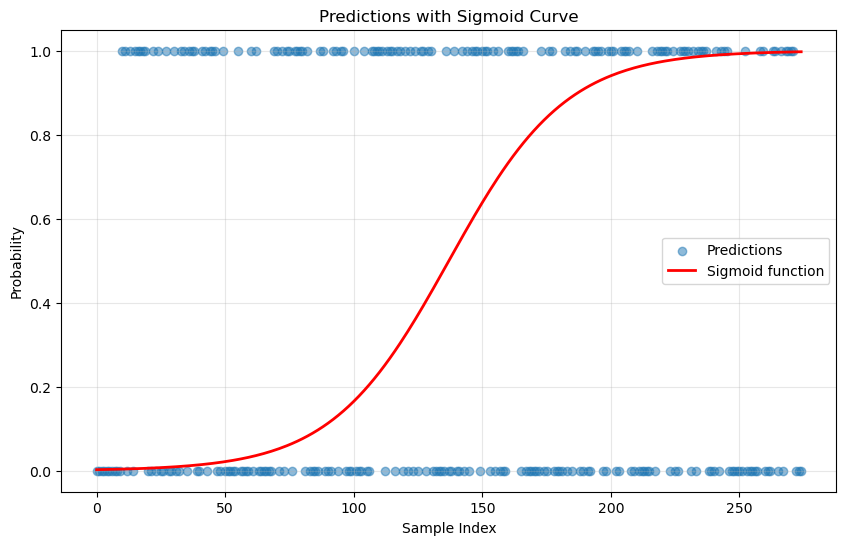

In [ ]:
# Plot sigmoid curve scaled to match prediction indices
sigmoid_scaled = 1 / (1 + np.exp(-np.linspace(-6, 6, len(y_pred))))
# Plot predictions
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_pred)), y_pred, alpha=0.7, label='Predictions')
plt.plot(range(len(y_pred)), sigmoid_scaled, 'r-', linewidth=2, label='Sigmoid function')


plt.xlabel('Sample Index')
plt.ylabel('Probability')
plt.title('Predictions with Sigmoid Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
